In [ ]:
# data: https://www.kaggle.com/biphili/customer-segmentation-k-means-pca/data?select=purchase+data.csv

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

**Importing Python Module**

In [2]:
import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
df_segmentation = pd.read_csv('./segmentation-data.csv',index_col =0)
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


**Exploring data**

In [5]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


So we can see that we have obeservation for 2000 customers.Mean age of the dataset is 35.9 years.With an average income of $ 120954.

**Correlation Estimate**

In [6]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


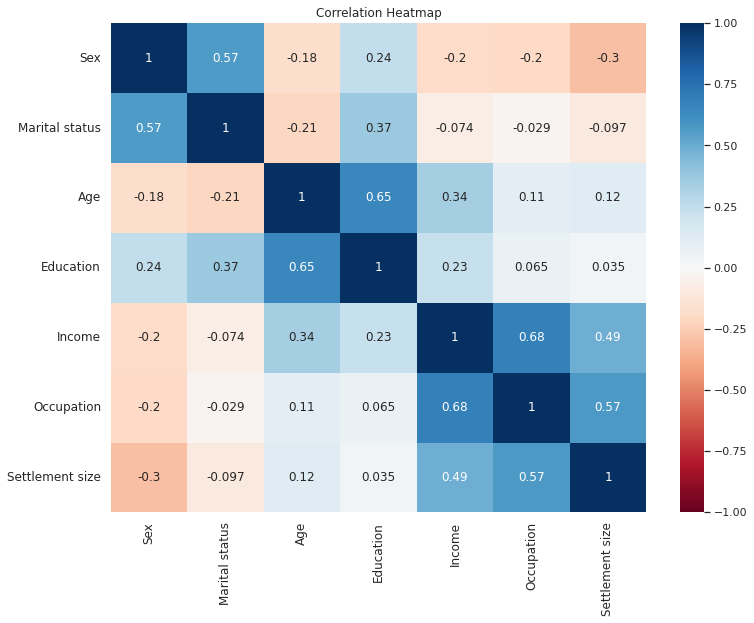

In [7]:
plt.figure(figsize = (12,9))
s = sns.heatmap(df_segmentation.corr(),
               annot = True,
               cmap = 'RdBu',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(),rotation = 0,fontsize = 12)
s.set_xticklabels(s.get_xticklabels(),rotation =90,fontsize =12)
plt.title('Correlation Heatmap')
plt.show()

We can see a correlation of 0.57 between occupation and settlement size.This shows that a good occupation also means the size of the house would be bigger.
Income and occupation has a correlation of 0.68 which shows once income highly depends on the type of occupation.

**Vizualise Raw Data**

Text(0.5, 1.0, 'Vizualization of raw data')

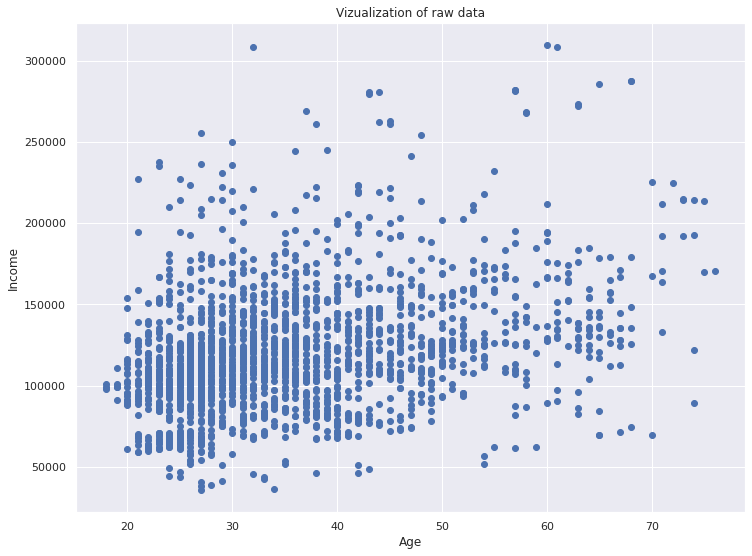

In [8]:
plt.figure(figsize = (12,9))
plt.scatter(df_segmentation.iloc[:,2],df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Vizualization of raw data')


There is no Linear Relation between the Age and Income.

**Standardization**

In [9]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

Satndardization is done so that impact of all the parameters on the predicted value have same weightage.

**K Means Clustering**

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters =i,init ='k-means++',random_state=42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

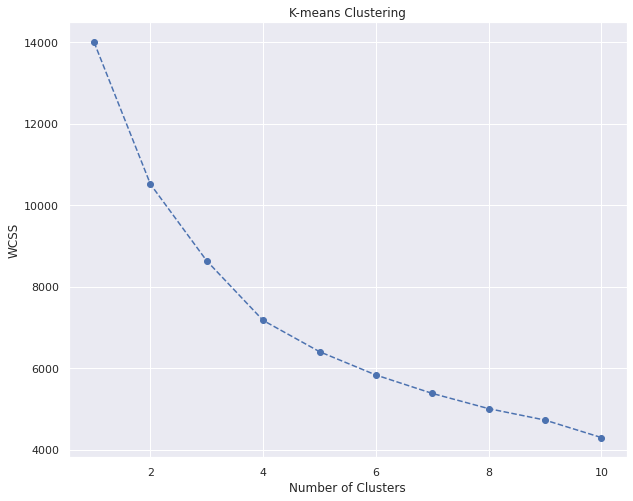

In [11]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11),wcss,marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering');

From the Elbow Diagram we can see four would be the approprite number of clusters.

In [12]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',random_state = 42)
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

**Results**

In [13]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_ 

In [14]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis 

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


0- has average age 56 income of $ 1.58 lac and 68 percent are married we call this call this class as well off.

1-has average age 35 income of $ 0.97 lac and 4 percent are married we call this call this class as Fewer Opportunities

2-has average age 36 income of $ 1.41 lac and 18 percent are married we call this call this class as Career Focused

3-has average age 29 income of $ 1.05 lac and 88 percent are married we call this call this class as Standard





In [15]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()

In [16]:
df_segm_analysis['Prop Obs'] =df_segm_analysis['N Obs']/ df_segm_analysis['N Obs'].sum()

In [17]:
df_segm_analysis 

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [18]:
df_segm_analysis.rename({0:'Well Off',
                        1:'Fewer Opportunities',
                        2:'Standard',
                        3:'Career Focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
Well Off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
Fewer Opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
Career Focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


So we can see that 31 % Fall in the Career Focused category

33 % in Standard 

21% in Fewer Opportunities 

13.5 % in Well Off

In [19]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'Well Off',
                        1:'Fewer Opportunities',
                        2:'Standard',
                        3:'Career Focused'}) 
#df_segm_kmeans

/home/manero/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


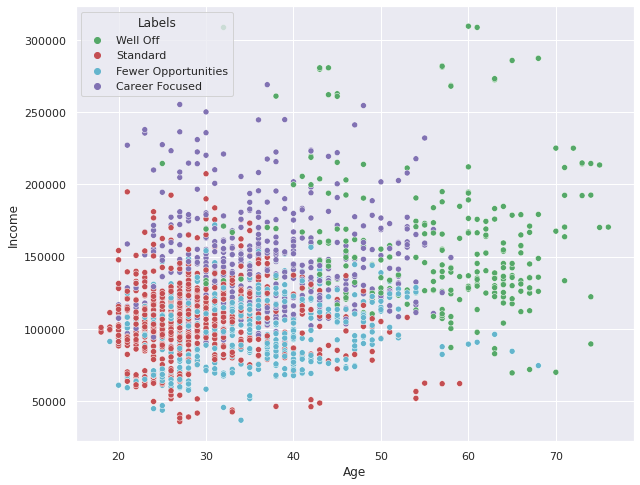

In [20]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis,hue = df_segm_kmeans['Labels'],palette =['g','r','c','m']);

From the above graph we can clearly see that there is clear separation of only well off cluster.Other three cluster are not easily separable.Now we will try to use PCA to reduce the dimentionality of the model and therby improve the results and otain better segregation of clusters.

**PCA**

In [21]:
from sklearn.decomposition import PCA
pca = PCA()

In [22]:
pca.fit(segmentation_std)

PCA()

In [23]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

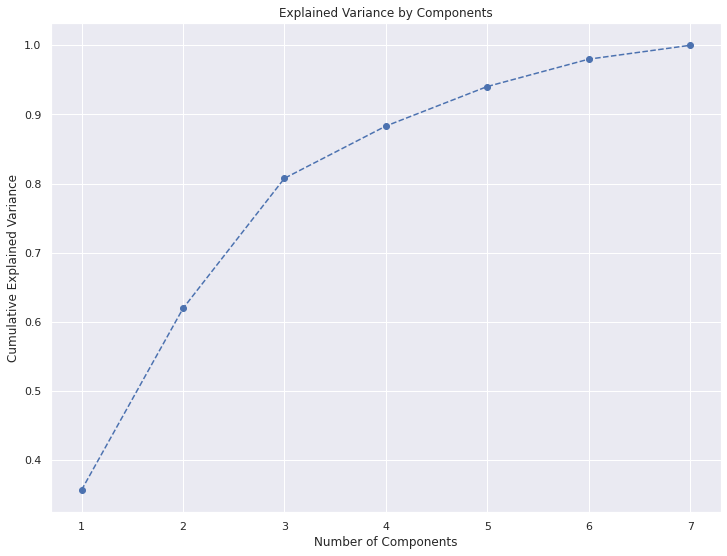

In [24]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

We can see that three principle componets together explain more than 80% of the data.Generally the thumb rule is we consider principle components which can explain more than 80% of our result.

**Fitting PCA with Four Principle Components**

In [25]:
pca = PCA(n_components =3)

In [26]:
pca.fit(segmentation_std)

PCA(n_components=3)

**PCA Results**

In [27]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

We can see that PCA is 3x7 Array 

In [28]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                          columns = df_segmentation.columns.values,
                          index = ['Component 1','Component 2','Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x7f5a65022220>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

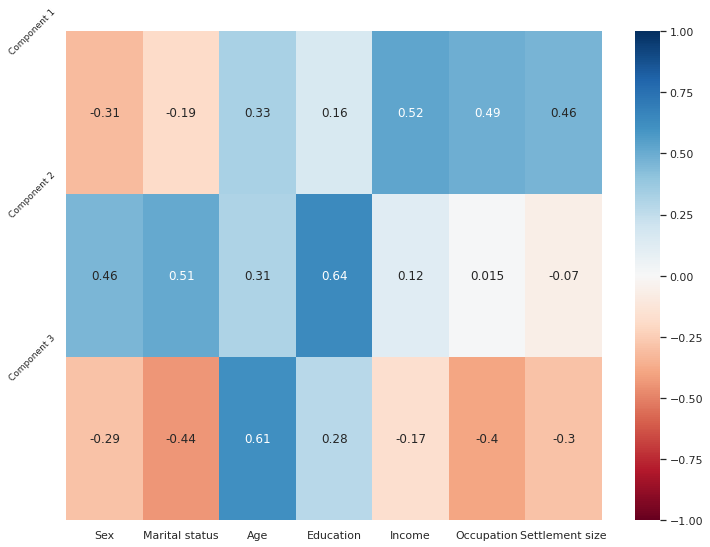

In [29]:
plt.figure(figsize = (12,9))
sns.heatmap(df_pca_comp,
           vmin=-1,
           vmax=1,
           cmap='RdBu',
           annot=True)
plt.yticks([0,1,2],
          ['Component 1','Component 2','Component 3'],
           rotation =45,
          fontsize=9)

In [30]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [31]:
scores_pca = pca.transform(segmentation_std)

**K Means clustering with PCA**

In [32]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters =i,init ='k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

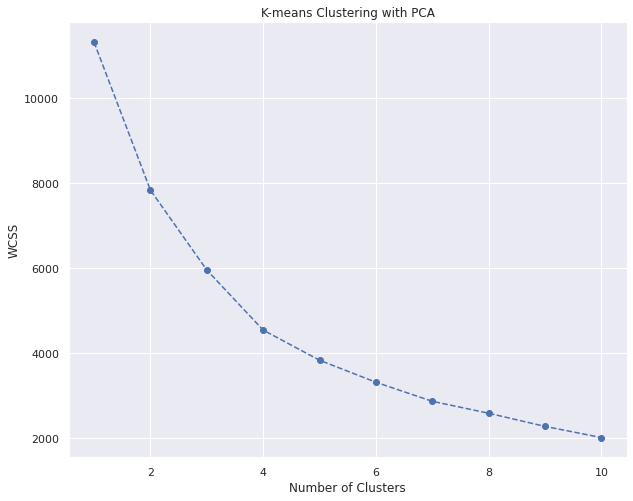

In [33]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11),wcss,marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering with PCA')
plt.show()

Looking at the elbow curve we can see that 4 would be the optimum number of cluster

In [34]:
kmeans_pca = KMeans(n_clusters = 4,init ='k-means++',random_state=42)

In [35]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

**K-means clustering with PCA**

In [36]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop=True),pd.DataFrame(scores_pca)],axis = 1)
df_segm_pca_kmeans.columns.values[-3:] = ['Component 1','Component 2','Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [37]:
#df_segm_pca_kmeans

In [38]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


0 - Well Off 

1 - Fewer Opportunities 

2 - Standard 

3 - Career Focused

In [39]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] =df_segm_pca_kmeans_freq['N Obs']/ df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'Well Off',
                                                         1:'Fewer Opportunities',
                                                         2:'Standard',
                                                         3:'Career Focused'})
df_segm_pca_kmeans_freq 

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
Well Off,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
Fewer Opportunities,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
Standard,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
Career Focused,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [40]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'Well Off',
                                                         1:'Fewer Opportunities',
                                                         2:'Standard',
                                                         3:'Career Focused'})

/home/manero/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Component 2', ylabel='Component 1'>

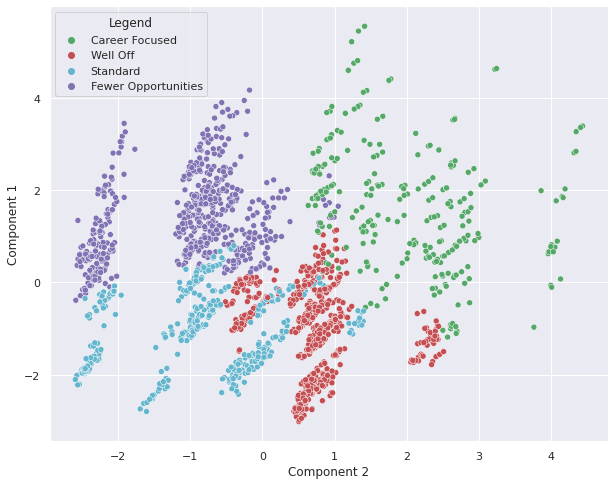

In [41]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis,hue = df_segm_pca_kmeans['Legend'],palette = ['g','r','c','m'])

From the above plot we can see that the customers are well segmented.So using PCA helped us to improve our customer segmentation results.